## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
from sklearn.metrics import get_scorer

07-21 10:30:08 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
X,y = datasets.load_breast_cancer(as_frame=True,return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=335)
train_data = pd.concat([X_train,y_train],axis=1)
eval_data = pd.concat([X_test,y_test],axis=1)

# Without Feature_reselection
### _best_reward is 0.9473

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


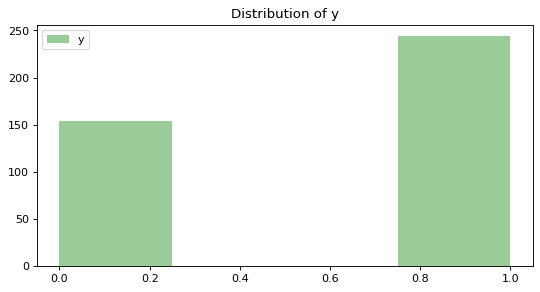

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,20,0.922111,10,0.967337,112.151438,19,20


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,10,0.967337,9.221477,"[2, 3, 0, 2, 3, 3]"
1,6,0.962312,2.426963,"[0, 1, 0, 2, 170, 2, 3, 2, 2]"
2,19,0.959799,1.713860,"[2, 0, 0, 1, 2, 4]"
3,12,0.954774,2.814804,"[1, 0, 0, 3, 3, 1, 2, 1, 3, 0]"
4,7,0.949749,3.361116,"[1, 1, 0, 2, 2, 1, 0, 1, 0, 0]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 3, 0, 2, 3, 3]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,10
5-Module_CatBoostEstimator_1.l2_leaf_reg,20


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.972362
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.45, 0.4, 0.05, 0.0, 0.0, 0.05, 0.0, 0.0, 0...."
1,scores,"[0.9824120603015075, 0.9849246231155779, 0.984..."
2,best_stack,"[0, 15, 0, 0, 0, 1, 1, 1, 5, 0, 0, 0, 0, 1, 2,..."
3,hits,"{0: 9, 15: 1, 1: 8, 5: 1, 2: 1}"
4,ensemble_size,20


In [3]:
experiment = make_experiment(train_data.copy(),target='target',max_trials=20,random_state=8888)
estimator = experiment.run()

In [4]:
scorer = get_scorer(metric_to_scoring('accuracy'))
score = scorer(estimator, X_test, y_test)
score

0.9473684210526315

# Use Feature_reselection
 ###   _best_reward is 0.9649

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


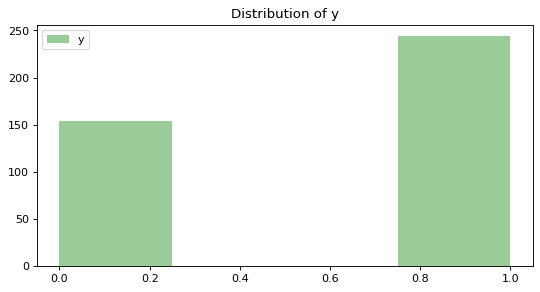

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,14,0.964824,5,0.977387,100.596811,15,20


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,5,0.977387,0.766232,"[2, 0, 1, 3, 0, 2, 4]"
1,6,0.969849,8.571801,"[2, 1, 0, 2, 3, 4]"
2,12,0.969849,1.630854,"[2, 1, 1, 3, 2, 0, 4]"
3,1,0.967337,1.026867,"[2, 2, 1, 1, 1, 1, 1]"
4,2,0.967337,1.673004,"[2, 0, 0, 3, 2, 4]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 0, 1, 3, 0, 2, 4]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.1
4-Module_CatBoostEstimator_1.depth,3
5-Module_CatBoostEstimator_1.l2_leaf_reg,10
6-numeric_or_scaler_0.hp_or,4


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.972362
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Feature Reselection

### Initliazed parameters

,key,value
0,estimator_size,5
1,name,feature_reselection
2,number,None
3,quantile,None
4,scorer,make_scorer(accuracy_score)
5,strategy,None
6,threshold,0.001


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean texture, mean concave points, area error..."
2,unselected_features,"[mean radius, mean perimeter, mean area, mean ..."
3,importances,"{'importances_mean': [0.0005025125628140703, 0..."


### Permutation importances

,feature,importance,std
0,mean radius,0.000503,0.001005
1,mean texture,0.005829,0.005673
2,mean perimeter,0.000000,0.000000
3,mean area,0.000302,0.001082
4,mean smoothness,0.000101,0.000492
5,mean compactness,0.000000,0.000000
6,mean concavity,0.000503,0.001421
7,mean concave points,0.005126,0.004521
8,mean symmetry,0.000000,0.000000
9,mean fractal dimension,0.000201,0.000682


## Two Stage Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,two_stage_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.952261,1,0.972362,29.151828,11,20


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,1,0.972362,7.714928,"[2, 0, 1, 0, 3, 1, 0]"
1,5,0.972362,1.624381,"[2, 3, 1, 1, 2, 2, 1]"
2,9,0.969849,0.486062,"[0, 1, 1, 2, 95, 0, 2, 2, 1, 0]"
3,8,0.967337,0.757410,"[2, 2, 0, 1, 0, 1]"
4,6,0.962312,8.488082,"[2, 0, 1, 2, 3, 2, 2]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 0, 1, 0, 3, 1, 0]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.001
4-Module_CatBoostEstimator_1.depth,10
5-Module_CatBoostEstimator_1.l2_leaf_reg,2
6-numeric_or_scaler_0.hp_or,0


### Fitted parameters

,key,value
0,input_features,"[mean texture, mean concave points, area error..."
1,best_reward,0.982412
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.45, 0.4, 0.05, 0.0, 0.0, 0.05, 0.0, 0.0, 0...."
1,scores,"[0.9824120603015075, 0.9849246231155779, 0.984..."
2,best_stack,"[0, 15, 0, 0, 0, 1, 1, 1, 5, 0, 0, 0, 0, 1, 2,..."
3,hits,"{0: 9, 15: 1, 1: 8, 5: 1, 2: 1}"
4,ensemble_size,20


0.9649122807017544

In [5]:
experiment = make_experiment(train_data.copy(),target='target',
                             random_state=8888,max_trials=20,
                             feature_reselection=True)
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('accuracy'))
score = scorer(estimator, X_test, y_test)
score

# Set more params of  feature_reselection
### _best_reward is 0.959

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


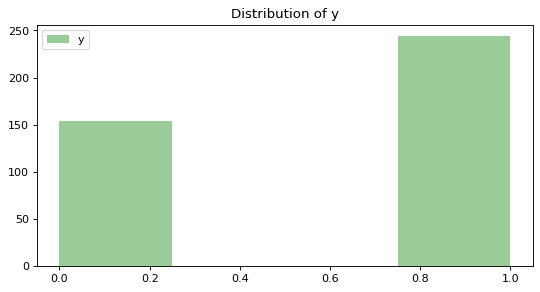

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,17,0.934673,8,0.972362,54.37443,18,20


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,8,0.972362,5.870703,"[0, 0, 0, 1, 35, 1, 2, 1, 0]"
1,3,0.967337,0.460704,"[0, 2, 0, 0, 90, 3, 2, 2, 0]"
2,2,0.964824,9.987469,"[2, 2, 1, 3, 3, 1, 3]"
3,5,0.964824,9.782458,"[2, 1, 1, 3, 3, 1, 4]"
4,18,0.964824,0.486508,"[0, 0, 0, 2, 350, 3, 2, 2, 1]"


#### Best Trial:

key,value
signature,541efd857751b207e901868fb0bc398b
vectors,"[0, 0, 0, 1, 35, 1, 2, 1, 0]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,False
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,35
5-Module_LightGBMEstimator_1.max_depth,5
6-Module_LightGBMEstimator_1.learning_rate,0.5
7-Module_LightGBMEstimator_1.reg_alpha,0.01


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.972362
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Feature Reselection

### Initliazed parameters

,key,value
0,estimator_size,5
1,name,feature_reselection
2,number,None
3,quantile,None
4,scorer,make_scorer(accuracy_score)
5,strategy,None
6,threshold,0.001


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean texture, mean concave points, area error..."
2,unselected_features,"[mean radius, mean perimeter, mean area, mean ..."
3,importances,"{'importances_mean': [0.0005025125628140703, 0..."


### Permutation importances

,feature,importance,std
0,mean radius,0.000503,0.001005
1,mean texture,0.005829,0.005673
2,mean perimeter,0.000000,0.000000
3,mean area,0.000302,0.001082
4,mean smoothness,0.000101,0.000492
5,mean compactness,0.000000,0.000000
6,mean concavity,0.000503,0.001421
7,mean concave points,0.005126,0.004521
8,mean symmetry,0.000000,0.000000
9,mean fractal dimension,0.000201,0.000682


## Two Stage Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,two_stage_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,20,0.650754,15,0.982412,32.356666,19,20


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,15,0.982412,0.665364,"[2, 2, 1, 3, 0, 1, 4]"
1,8,0.972362,1.342640,"[2, 0, 1, 0, 2, 2, 2]"
2,2,0.969849,0.569529,"[0, 3, 0, 0, 260, 1, 2, 1, 1]"
3,14,0.967337,5.187844,"[0, 2, 0, 1, 405, 0, 3, 3, 4]"
4,17,0.967337,1.524075,"[0, 0, 1, 0, 500, 1, 3, 2, 1, 1]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 2, 1, 3, 0, 1, 4]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.1
4-Module_CatBoostEstimator_1.depth,3
5-Module_CatBoostEstimator_1.l2_leaf_reg,2
6-numeric_or_scaler_0.hp_or,4


### Fitted parameters

,key,value
0,input_features,"[mean texture, mean concave points, area error..."
1,best_reward,0.982412
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.45, 0.4, 0.05, 0.0, 0.0, 0.05, 0.0, 0.0, 0...."
1,scores,"[0.9824120603015075, 0.9849246231155779, 0.984..."
2,best_stack,"[0, 15, 0, 0, 0, 1, 1, 1, 5, 0, 0, 0, 0, 1, 2,..."
3,hits,"{0: 9, 15: 1, 1: 8, 5: 1, 2: 1}"
4,ensemble_size,20


0.9590643274853801

In [6]:
experiment = make_experiment(train_data.copy(),target='target',random_state=8888,max_trials=20,
                             feature_reselection=True,
                             feature_reselection_estimator_size=5,
                             feature_reselection_threshold=0.001,
#                              feature_reselection_quantile=0.95,
#                              feature_reselection_number=20
                            )
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('accuracy'))
score = scorer(estimator, X_test, y_test)
score